## Name : Tirth Hihoriya
## Roll no : 18bce244
## Prac- 4 : CIFAR10_CNN

In [1]:
import numpy as np
import pandas as pd
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

### Load the dataset

In [2]:
(X_train, y_train), (X_test,y_test) = cifar10.load_data()
print("X_train -> ",X_train.shape)
print("y_train -> ",y_train.shape)
print("X_test  -> ",X_test.shape)
print("y_test  -> ",y_test.shape)

X_train ->  (50000, 32, 32, 3)
y_train ->  (50000, 1)
X_test  ->  (10000, 32, 32, 3)
y_test  ->  (10000, 1)


In [3]:
X_train[:5]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

#### Reshape

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

### Labels

In [6]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

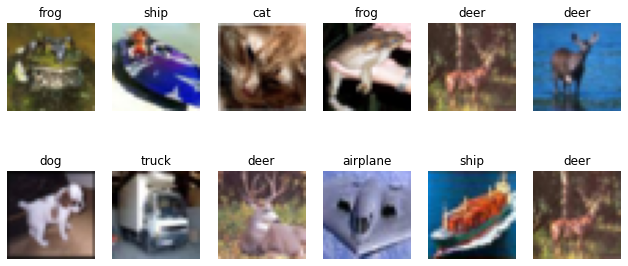

In [7]:
cols = 6
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_train[random_index, :])
        label =  classes[y_train[random_index]]
        ax.set_title(label)
plt.show()

### Normalizing the training data


In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## Model

In [9]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same',
                input_shape=(32,32,3)))
model.add(Conv2D(filters=48, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')) 
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2))) 


model.add(Conv2D(filters=196, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(Dropout(0.45))
model.add(Dense(128, activation='relu'))

model.add(Dense(len(classes), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 48)        13872     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 48)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 96)        41568     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 96)        83040     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 96)          0

In [10]:
results = model.fit(X_train, y_train, 
                    epochs=5, batch_size=128,
                    validation_data=(X_test, y_test))

Epoch 1/5
391/391 [==============================] - 246s 621ms/step - loss: 2.0627 - accuracy: 0.2133 - val_loss: 1.4777 - val_accuracy: 0.4391
Epoch 2/5
391/391 [==============================] - 265s 677ms/step - loss: 1.4480 - accuracy: 0.4608 - val_loss: 1.1992 - val_accuracy: 0.5776
Epoch 3/5
391/391 [==============================] - 263s 674ms/step - loss: 1.1654 - accuracy: 0.5785 - val_loss: 1.0153 - val_accuracy: 0.6389
Epoch 4/5
391/391 [==============================] - 268s 685ms/step - loss: 0.9883 - accuracy: 0.6480 - val_loss: 0.8643 - val_accuracy: 0.6941
Epoch 5/5
391/391 [==============================] - 265s 677ms/step - loss: 0.8607 - accuracy: 0.6968 - val_loss: 0.8061 - val_accuracy: 0.7175


### Prediction

In [11]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[1.57747854e-04, 4.05078608e-05, 1.94287871e-03, 6.05650425e-01,
        5.24180417e-04, 3.77019823e-01, 1.23517504e-02, 2.05393136e-03,
        1.07924781e-04, 1.50851571e-04],
       [8.53356626e-03, 1.13663878e-02, 4.48612445e-05, 2.34781764e-05,
        1.19828592e-05, 1.48907600e-06, 8.35340234e-06, 1.81271616e-06,
        9.77257907e-01, 2.75019347e-03],
       [1.19783051e-01, 6.27930239e-02, 2.34726705e-02, 2.34261006e-02,
        1.75496563e-02, 5.98416105e-03, 9.05995257e-03, 6.99703395e-03,
        6.86995924e-01, 4.39383797e-02],
       [5.81409156e-01, 1.42361724e-03, 2.02271983e-01, 4.61976081e-02,
        4.30865996e-02, 1.24763912e-02, 6.66772621e-03, 7.68176187e-03,
        9.62478667e-02, 2.53735413e-03],
       [1.05679086e-04, 3.03986199e-05, 5.02018407e-02, 2.19451636e-02,
        4.22940738e-02, 7.72865023e-04, 8.84543657e-01, 3.58015241e-05,
        4.32229899e-05, 2.71947574e-05]], dtype=float32)

In [12]:
y_classes = np.argmax(y_pred, axis=1)
y_classes[:5]

array([3, 8, 8, 0, 6], dtype=int64)

### Metrics

In [13]:
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_classes))
print(metrics.classification_report(y_test,y_classes))
print(metrics.confusion_matrix(y_test,y_classes))

0.7175
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1000
           1       0.89      0.89      0.89      1000
           2       0.65      0.54      0.59      1000
           3       0.47      0.55      0.51      1000
           4       0.67      0.61      0.64      1000
           5       0.53      0.72      0.61      1000
           6       0.81      0.73      0.77      1000
           7       0.71      0.77      0.74      1000
           8       0.88      0.82      0.85      1000
           9       0.84      0.87      0.86      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000

[[670  19  87  44  11  14   6  33  73  43]
 [  7 887   0  11   2   7   7   6   8  65]
 [ 44   2 538  97 100 116  55  36   8   4]
 [  4   3  43 552  46 263  44  33   3   9]
 [ 15   2  68  90 609  43  33 134   4   2]
 [  2   0  21 172  

### Ploting predicted and actual label

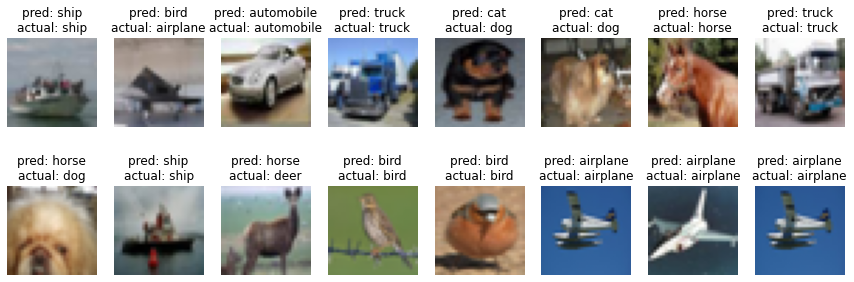

In [14]:
cols = 8
rows = 2
fig = plt.figure(figsize=(2 * cols - 1, 3 * rows - 1))
for i in range(cols):
    for j in range(rows):
        random_index = np.random.randint(0, len(y_test))
        ax = fig.add_subplot(rows, cols, i * rows + j + 1)
        ax.grid('off')
        ax.axis('off')
        ax.imshow(X_test[random_index, :])
        pred_label =  classes[y_classes[random_index]]
        actual_label =  classes[y_test[random_index]]
        ax.set_title("pred: {}\nactual: {}".format(pred_label, actual_label))
plt.show()

In [15]:
def show_plots(history):
    loss_vals = history['loss']
    val_loss_vals = history['val_loss']
    epochs = range(1, len(history['accuracy'])+1)
    
    f, ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))
    
    # plot losses on ax[0]
    ax[0].plot(epochs, loss_vals, color='navy',marker='o', linestyle='-', label='Training Loss')
    ax[0].plot(epochs, val_loss_vals, color='firebrick', marker='*', label='Validation Loss')
    ax[0].set_title('Training & Validation Loss')
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')
    ax[0].legend(loc='best')
    ax[0].grid(True)
    
    # plot accuracies
    acc_vals = history['accuracy']
    val_acc_vals = history['val_accuracy']

    ax[1].plot(epochs, acc_vals, color='navy', marker='o', ls='-', label='Training Accuracy')
    ax[1].plot(epochs, val_acc_vals, color='firebrick', marker='*', label='Validation Accuracy')
    ax[1].set_title('Training & Validation Accuracy')
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(loc='best')
    ax[1].grid(True)
    
    plt.show()
    plt.close()

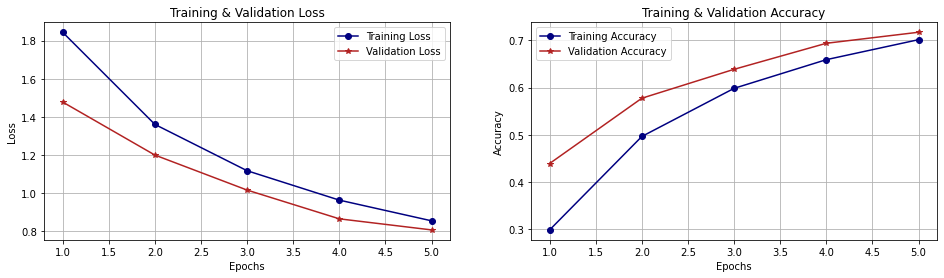

In [16]:
show_plots(results.history)